## How to make model of Envi Apples by using Linear Regression Algorithm
> create dataset that predict the next time step using the previous observation

In [211]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Envi Apple***

- อ่านไฟล์ csv ของชุดข้อมูลตัวอย่างของ Envi

In [212]:
df_envi_inter = pd.read_csv("../../../DataSet/Envi/envi_inter.csv")
# df_envi = pd.read_csv("../../DataSet/Envi/envi.csv")
df_envi_inter.info()
# df_envi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Envi    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [213]:
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [214]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], format="%d/%m/%Y")
df_envi_inter.sort_values(by="Date", inplace=True)
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Envi    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


- ทำนายวันถ้ดไปโดยใส่ค่าปริมาณของแอปเปิ้ลวันก่อนหน้า 1 วัน

In [215]:
df_envi_inter["y"] = df_envi_inter["Envi"].shift(-1)
df_envi_inter.dropna(inplace=True)
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    168 non-null    datetime64[ns]
 1   Envi    168 non-null    int64         
 2   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.2 KB


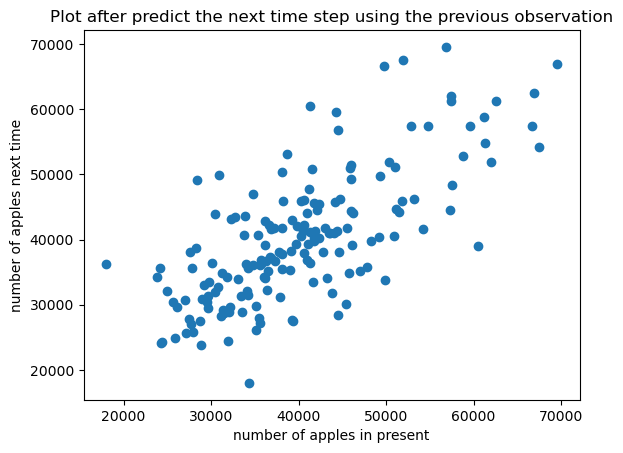

In [216]:
plt.scatter(df_envi_inter["Envi"], df_envi_inter["y"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.title("Plot after predict the next time step using the previous observation")
plt.show()

In [217]:
x = np.array(df_envi_inter.drop(columns='y'))
y = np.array(df_envi_inter.drop(columns='Envi'))

### ***Train Model Of Fuji Apple***

In [218]:
def findBestRandomState(r, x, y):
    random = 0
    a = 100

    model = LinearRegression()
    for _ in range(r):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

        y_predict = model.predict(x_test.reshape(-1, 1))
        if (buff := mean_absolute_error(y_test, y_predict)) < a:
            a = buff
            random = _
        # print(f"The Mean Square Error: {mean_squared_error(y_test, y_predict)}")
        # print(f"The R2 score: {r2_score(y_test, y_predict)}")
    print(a, random)

# findBestRandomState(1000000,x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=257002)

#Seed 222431 with mean squerer error
#Seed 257002 with mean absolute error

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(x_test, key=lambda x: x[0]))

model = LinearRegression()
model.fit(x_train[:, 1:], y_train[:, 1:])

LinearRegression()

### ***Predict from test_dataset Of Envi Apple***

Mean Absolute Error: 1847.988930473116
The Mean Square Error: 5635268.359230728
The R2 score: 0.9165309780231493


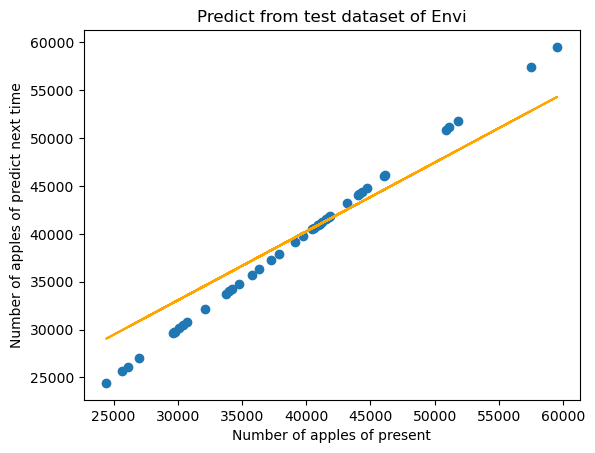

In [219]:
x_test
y_predict = model.predict(x_test[:, 1:])
print(f"Mean Absolute Error: {mean_absolute_error(y_test[:, 1:], y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(y_test[:, 1:], y_predict)}")
print(f"The R2 score: {r2_score(y_test[:, 1:], y_predict)}")

plt.scatter(x_test[:, 1:], y_test[:, 1:])
plt.plot(x_test[:, 1:], y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Envi")
plt.show()

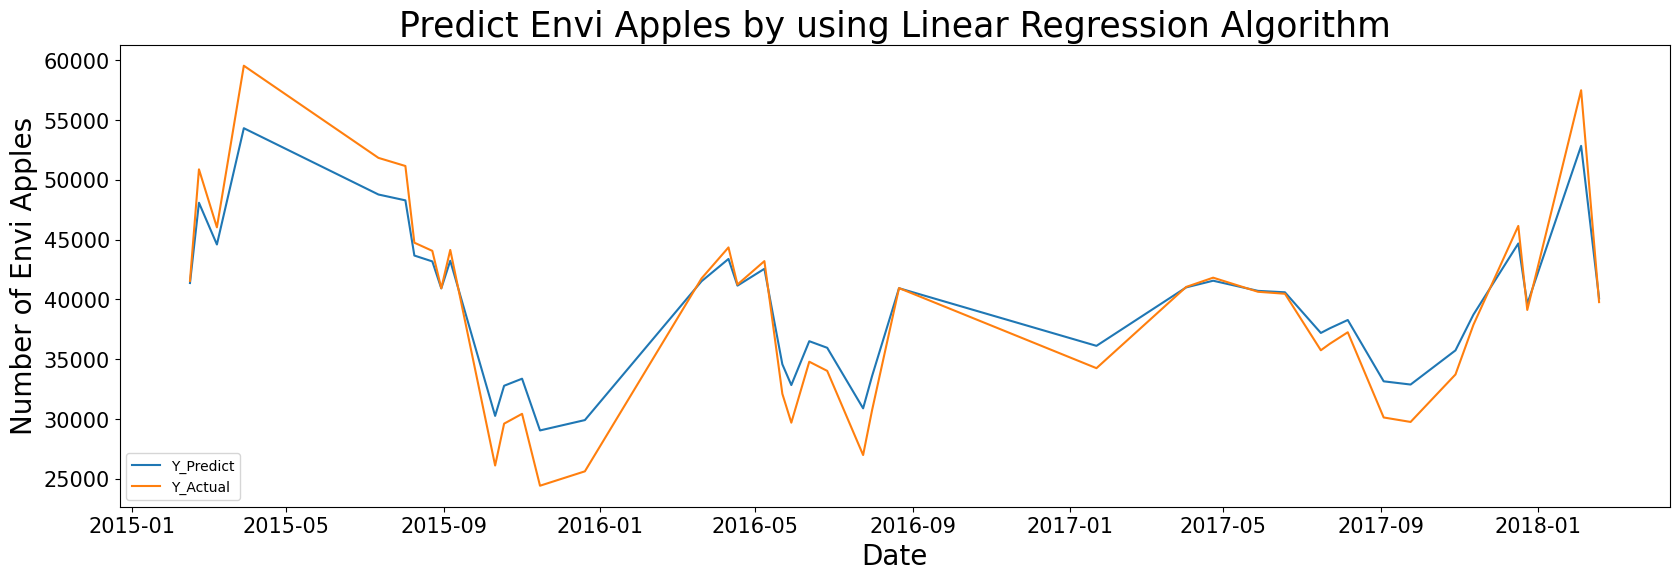

In [220]:
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x_test[:, :1], y_predict, label="Y_Predict")
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Envi Apples", fontsize=20)
plt.title("Predict Envi Apples by using Linear Regression Algorithm", fontsize=25)
plt.legend()
plt.show()

---